# Analyzing the effect of various parameters on Student Performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Collecting Data

In [ ]:
data = pd.read_csv("StudentsPerformance - Copy.csv")
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Data Analysis

### **1) Relation between gender and academic performance**

In [ ]:
df =data.groupby(['gender']).mean()
df

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


Text(0.5, 0.98, 'Score distribution based on Gender')

<Figure size 720x2160 with 0 Axes>

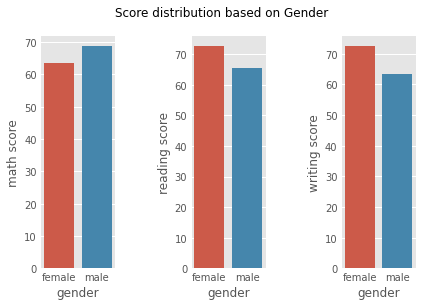

In [ ]:
style.use('ggplot')
plt.figure(figsize=(10,30))
fig,ax=plt.subplots(1,3)
fig.subplots_adjust(wspace=1)


sns.barplot(x=df.index,y="math score",data=df,ax=ax[0])

sns.barplot(x=df.index,y="reading score",data=df,ax=ax[1])

sns.barplot(x=df.index,y="writing score",data=df,ax=ax[2])

plt.suptitle('Score distribution based on Gender')

### **2) Relation between race/ethnicity and academic performance**

In [ ]:
df1 =data.groupby(['race/ethnicity']).mean()
df1

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


Text(0.5, 0.98, 'Score distribution based on Race')

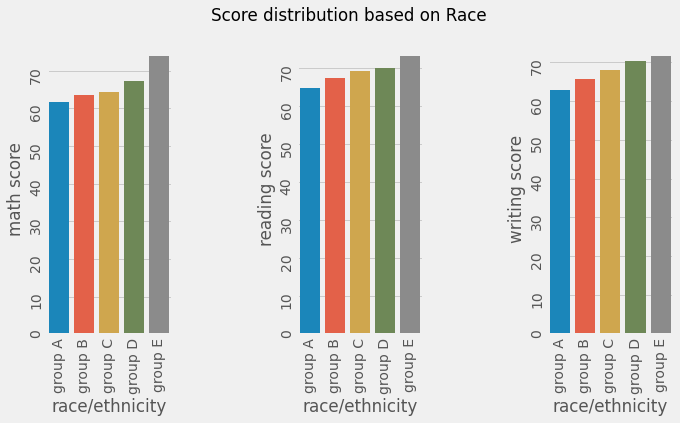

In [ ]:
style.use('fivethirtyeight')
fig,ax=plt.subplots(1,3)
fig.subplots_adjust(wspace=1)
fig.set_figheight(5)
fig.set_figwidth(10)

sns.barplot(x=df1.index,y="math score",data=df1,ax=ax[0])
ax[0].tick_params(labelrotation=90)

sns.barplot(x=df1.index,y="reading score",data=df1,ax=ax[1])
ax[1].tick_params(labelrotation=90)

sns.barplot(x=df1.index,y="writing score",data=df1,ax=ax[2])
ax[2].tick_params(labelrotation=90)


plt.suptitle('Score distribution based on Race')

### **3) Effect of Educational Status of Parents on Performance**

#### i) Distribution of students on basis of educational qualification of parents.

In [ ]:
x=pd.DataFrame(data.groupby(["parental level of education"])['gender'].count())
x['count']=x['gender']
x.drop('gender',axis=1,inplace=True)
x

,count
parental level of education,
associate's degree,222
bachelor's degree,118
high school,196
master's degree,59
some college,226
some high school,179


Text(0.5, 1.0, 'The Education Levels of Parents')

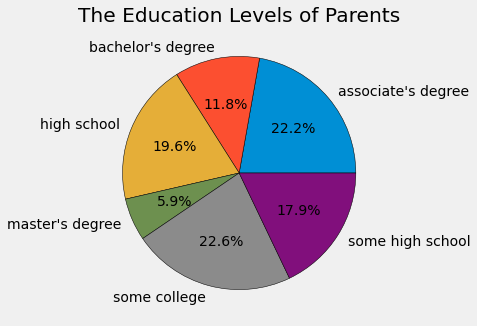

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(x='count',labels=x.index,data=x,autopct='%1.1f%%',wedgeprops={'edgecolor':'k'})
plt.title("The Education Levels of Parents")

#### ii) Effect of Parents Educational Status on Student Performance

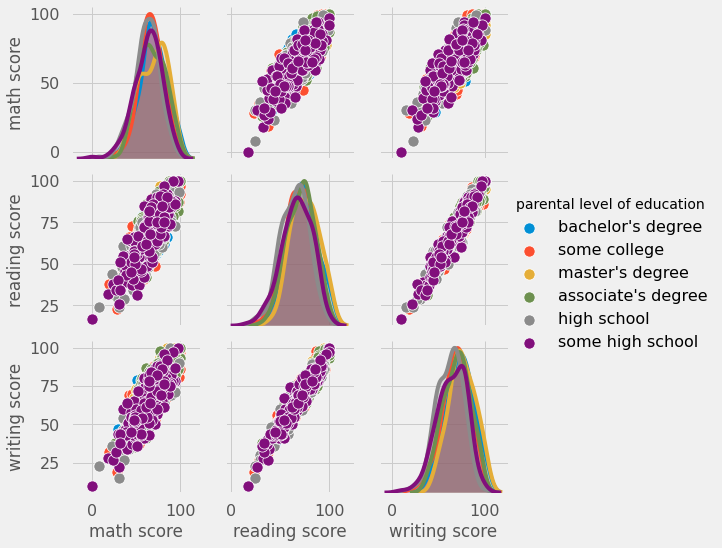

In [ ]:
style.use("fivethirtyeight")
sns.pairplot(hue='parental level of education',data=data)



### **4)Relation between student performance and test preparation course**

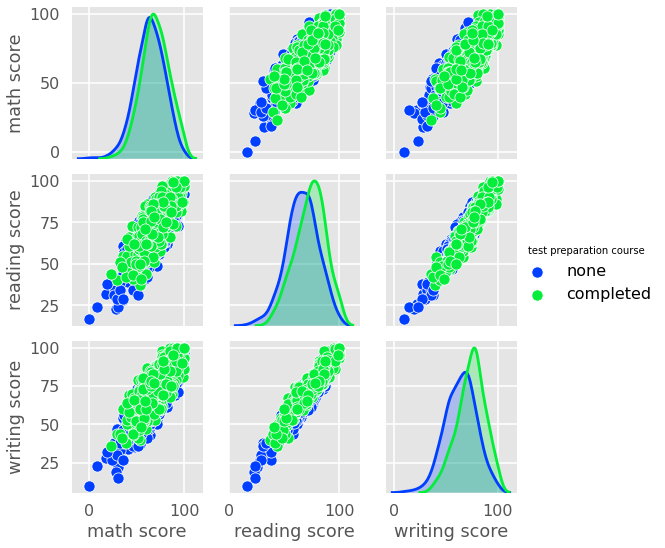

In [ ]:
style.use('seaborn-bright')
sns.pairplot(hue='test preparation course',data=data)


### **5) Effect of kind of lunch on Student Performance**

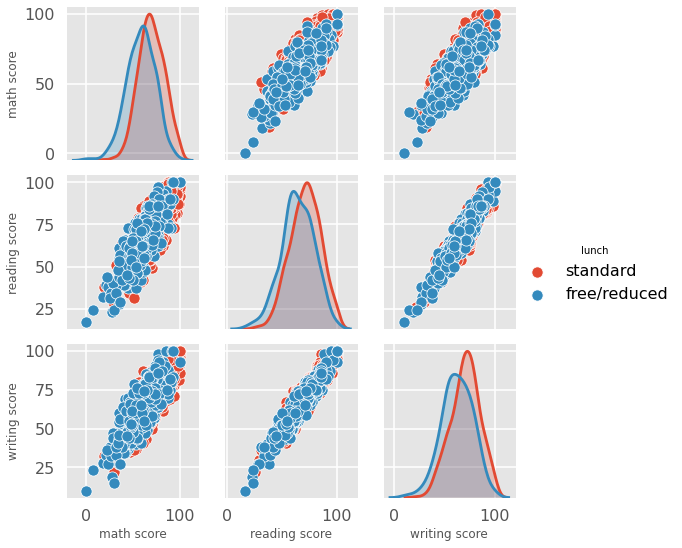

In [ ]:
style.use("ggplot")
sns.pairplot(hue='lunch',data=data)


## INSIGHTS
1) Male students perform better in Math. Female students are seen to perform better in reading and writing.

2) The overall avg performance of students belonging to Group E is better than other groups in all three subjects.

3) The parents of majority of students are well educated. Most of them are degree holders/college passouts.

4)Students whose status of test preparation in "complete" tend to perform **slightly** better than those with status as "none".

5)Students who recieve "standard lunch" have better performance than those recieving "free/reduced" lunch.

6) There is clear correlation between parental education level and exam scores of students.However the effect education level of parents on student performance is not so significant

# **ANALYZING CORRELATION BETWEEN VARIOUS SUBJECT PERFORMANCES**

In [ ]:
data.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## Correlation between Math Score and Reading Score





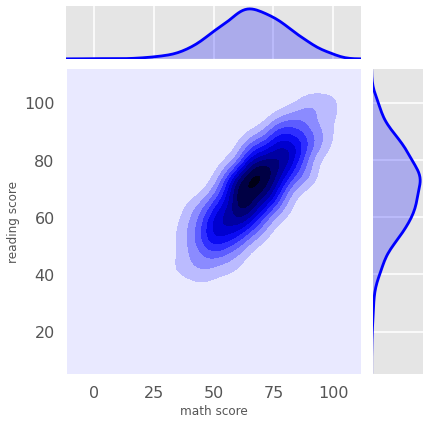

In [ ]:
sns.jointplot(x=data["math score"],y=data["reading score"],kind='kde',color='blue')

## Correlation between Math Score and Writing Score


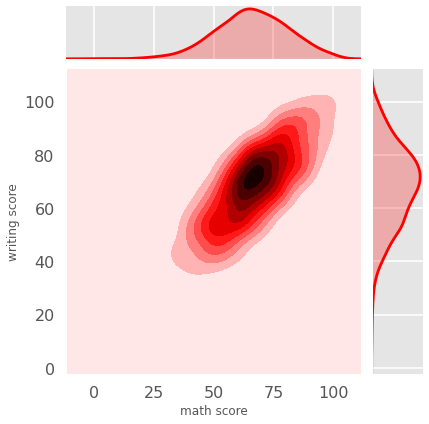

In [ ]:
sns.jointplot(x=data["math score"],y=data["writing score"],kind='kde',color='red')

## Correlation between Writing Score and Reading Score


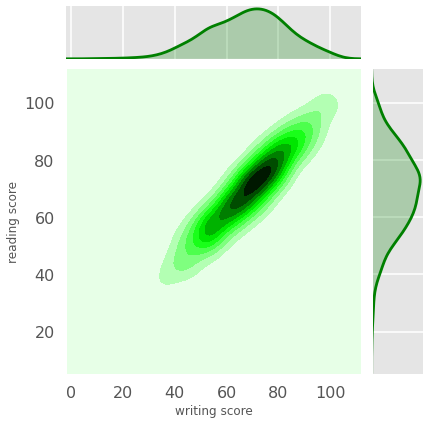

In [ ]:
sns.jointplot(x=data["writing score"],y=data["reading score"],kind='kde',color='green')

## INSIGHTS:
1) There is considerable correlation between math score and reading score **and**  math score and writing score.

2) There is a **strong** correlation between reading and writing scores.
